In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
titanic_data= pd.read_csv('train.csv')

In [77]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>
Sibsp is number of sibling in the ship
Parch is parents / children aboard the Titanic
</h3>

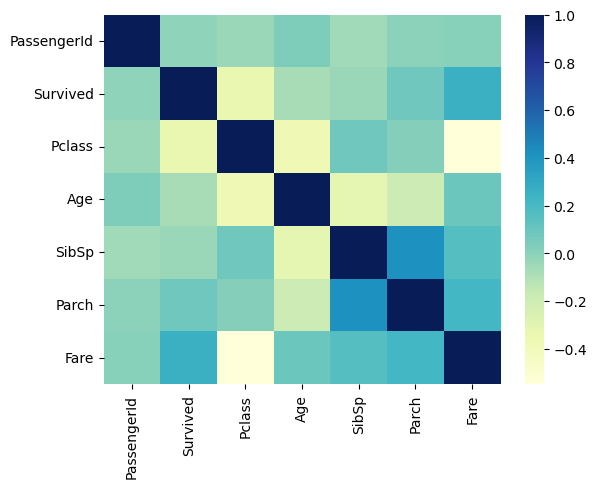

In [78]:
import seaborn as sns
# Drop non-numeric columns
numeric_titanic_data = titanic_data.select_dtypes(include=[np.number])

# Now, compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_titanic_data.corr(), cmap="YlGnBu")
plt.show()

In [79]:
"""StratifiedShuffleSplit is a cross-validtor that provides train/test indices to split data into train/test sets while
ensuring that the class distribution is preserved"""
from sklearn.model_selection import StratifiedShuffleSplit

"""this line initializes a stratifiedShuffleSplit object named split. it specifies that we want to perform one split (n_splits=1)
and the test set should contain 20% of the data. this mean 80% of data will be used for training"""
split = StratifiedShuffleSplit (n_splits=1,test_size=0.2)

"""in each iteration of the loop, it will generate train/test indices using the split object
split() method
it iterates over each split and assigns the training indices to train_indices and the testing indices to 
test_indices"""
"""
titanic_data[["Survived","Pclass","Sex"]]: these columns are used for stratifaction , which means that the spilit is done in such a way that the class 
distribution of the target vatiable is preserved across the retaining and testing case
"""
for train_indices, test_indices  in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    
    """this line selects the rows from the titanic_data DataFrame corresponding to the indices in train_indices and assigns them to a new DataFrame Strat_train_set"""
    Strat_train_set=titanic_data.loc[train_indices]
    Strat_test_set= titanic_data.loc[test_indices]
    

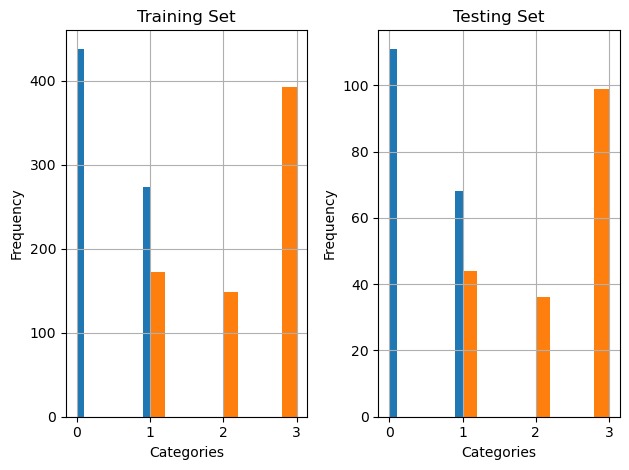

In [80]:
#this line reates the first subplot in a  1x2 grid of subplot. it specifies that the current plot will be the first one
plt.subplot(1, 2, 1)
#this line plots a histrogram of the "Survived variable from the training set"
Strat_train_set['Survived'].hist()

#this line plots a histrogram of the "Pclass" variable from training set
Strat_train_set['Pclass'].hist()
plt.xlabel('Categories')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.title('Training Set')  # Add title for the subplot

# This line creates the second subplot in the 1x2 grid of subplots. It specifies that the current plot will be the second one.
plt.subplot(1, 2, 2)
Strat_test_set['Survived'].hist()
Strat_test_set['Pclass'].hist()
plt.xlabel('Categories')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.title('Testing Set')  # Add title for the subplot

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


In [81]:
Strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 165 to 641
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


<h1> Creating a pipeline </h1>

In [82]:
#these classes are used for creating custom transg=fermors in scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

#This line defines a new class named AgeImputer that inherits from both BaseEstimator and TransformerMixin. This inheritance provides useful methods such as fit() and transform()
class AgeImputer(BaseEstimator, TransformerMixin):
    
    # this method is used to fit the transformer to the data. .in this case, the fit() method does nothing because the transformer doesn't learn anything from the data
    def fit(self,X,y=None):
        return self

    #this method is used to transform the data
    def transform(self,X):
        #creates SimpleImputer object imputer with the strategy set to "mean". This imputer will fill missing values in the "Age" column with the non-missing values
        imputer= SimpleImputer(strategy="mean")
        
        #applies the filt_transform() method of the SimpleImputer object to the Age column of the input DataFrame X
        X['Age'] = imputer.fit_transform(X[['Age']])
        
        #retyurns the modified DataFrame 'X' with the missing values in the 'Age' column imputed with the mean
        return X
    

In [83]:
#used to encode categorical integer features as a one-hot numeric array
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self 
    
    def transform(self,X):
        encoder=OneHotEncoder()
        
        #encodes Embarked column using one-hot encoding
        """encoding using one-hot means representing categorrical data as binary vector
        
        For example, let's consider the "Embarked" column which contains categorical values like "C", "S", and "Q" representing the ports of embarkation.

        *With one-hot encoding, each unique category in the "Embarked" column will be transformed into a new binary column.
         For each row, the binary column corresponding to the category that the row belongs to will have a value of 1, and all other binary columns will have a value of 0.
        
        *For instance, if a passenger embarked from "C", the one-hot encoding would represent this as [1, 0, 0]. If a passenger embarked from "S",
         it would be represented as [0, 1, 0], and so on.
        """
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names= ["C","S","Q","N"]

        #creates column C,S,Q,N and 
        for i in range(len(matrix.T)): #len(matrix.T) is four. Transformation is done because we want only get one binary digit. with transformation in the first 1d array we have true value of C and so one with the loop
            X[column_names[i]]=matrix.T[i]


        
    
        matrix= encoder.fit_transform(X[['Sex']]).toarray()

       

        column_names=["Female","Male"]

        #creates column female and male
        for i in range (len(matrix.T)): # len(matrix.T) is two
            X[column_names[i]]=matrix.T[i]

        return X
        


<h1>just for understanding only.
->REMOVE LATER
</h1>

In [84]:
encoder = FeatureEncoder()

# Apply transformation
transformed_data = encoder.transform(Strat_test_set.copy())  # Passing a copy to keep the original data intact
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 679 to 605
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          142 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        44 non-null     object 
 11  Embarked     178 non-null    object 
 12  C            179 non-null    float64
 13  S            179 non-null    float64
 14  Q            179 non-null    float64
 15  N            179 non-null    float64
 16  Female       179 non-null    float64
 17  Male         179 non-null    float64
dtypes: float64(8), int64(5), object(5)
memory usage: 26.6

In [85]:
X=Strat_test_set.copy()

X["X"]=transformed_data.T[0]

In [86]:
transformed_data.T

,679,186,626,857,596,445,422,516,396,328,...,885,374,424,671,435,56,615,43,0,605
PassengerId,680,187,627,858,597,446,423,517,397,329,...,886,375,425,672,436,57,616,44,1,606
Survived,1,1,0,1,1,1,0,1,0,1,...,0,0,0,0,1,1,1,1,0,0
Pclass,1,3,2,1,2,1,3,2,3,3,...,3,3,3,1,1,2,2,2,3,3
Name,"Cardeza, Mr. Thomas Drake Martinez","O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)","Kirkland, Rev. Charles Leonard","Daly, Mr. Peter Denis","Leitch, Miss. Jessie Wills","Dodge, Master. Washington","Zimmerman, Mr. Leo","Lemore, Mrs. (Amelia Milley)","Olsson, Miss. Elina","Goldsmith, Mrs. Frank John (Emily Alice Brown)",...,"Rice, Mrs. William (Margaret Norton)","Palsson, Miss. Stina Viola","Rosblom, Mr. Viktor Richard","Davidson, Mr. Thornton","Carter, Miss. Lucile Polk","Rugg, Miss. Emily","Herman, Miss. Alice","Laroche, Miss. Simonne Marie Anne Andree","Braund, Mr. Owen Harris","Lindell, Mr. Edvard Bengtsson"
Sex,male,female,male,male,female,male,male,female,female,female,...,female,female,male,male,female,female,female,female,male,male
Age,36.0,NaN,57.0,51.0,NaN,4.0,29.0,34.0,31.0,31.0,...,39.0,3.0,18.0,31.0,14.0,21.0,24.0,3.0,22.0,36.0
SibSp,0,1,0,0,0,0,0,0,0,1,...,0,3,1,1,1,0,1,1,1,1
Parch,1,0,0,0,0,2,0,0,0,1,...,5,1,1,0,2,0,2,2,0,0
Ticket,PC 17755,370365,219533,113055,248727,33638,315082,C.A. 34260,350407,363291,...,382652,349909,370129,F.C. 12750,113760,C.A. 31026,220845,SC/Paris 2123,A/5 21171,349910
Fare,512.3292,15.5,12.35,26.55,33.0,81.8583,7.875,10.5,7.8542,20.525,...,29.125,21.075,20.2125,52.0,120.0,10.5,65.0,41.5792,7.25,15.55


In [87]:
transformed_data["Male"]

679    1.0
186    0.0
626    1.0
857    1.0
596    0.0
      ... 
56     0.0
615    0.0
43     0.0
0      1.0
605    1.0
Name: Male, Length: 179, dtype: float64

<h1>Keep from here</h1>

In [88]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [89]:
#allows us to chain together multiple steps in a machine learning workflow
from sklearn.pipeline import Pipeline

#Inside the Pipeline constructor, a list of tuples is provided.
"""Each tuple represents a step in the pipeline. The tuples contain two elements: a string representing the name of the step 
and an instance of a transformer or estimator class. """
pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("FeatureEncoder", FeatureEncoder()),
                     ("FeatureDropper", FeatureDropper())])

In [90]:
encoder = FeatureDropper()

# Apply transformation
transformed_data = encoder.transform(Strat_test_set.copy())  # Passing a copy to keep the original data intact
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 679 to 605
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          142 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 15.3 KB


In [91]:
Strat_train_set= pipeline.fit_transform(Strat_train_set)

In [92]:
Strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
165,166,1,3,9.0,0,2,20.5250,0.0,0.0,1.0,0.0,1.0
600,601,1,2,24.0,2,1,27.0000,0.0,0.0,1.0,1.0,0.0
571,572,1,1,53.0,2,0,51.4792,0.0,0.0,1.0,1.0,0.0
762,763,1,3,20.0,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
293,294,0,3,24.0,0,0,8.8500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,526,0,3,40.5,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
6,7,0,1,54.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
322,323,1,2,30.0,0,0,12.3500,0.0,1.0,0.0,1.0,0.0
217,218,0,2,42.0,1,0,27.0000,0.0,0.0,1.0,0.0,1.0


In [93]:
Strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 165 to 641
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [94]:
#preproceesing step commonly used in machine learning pipelines to standardize the features by removing the mean and scaling to unit varience
from sklearn.preprocessing import StandardScaler

#preparing data
X=Strat_train_set.drop(['Survived'],axis=1)
Y=Strat_train_set['Survived']


scaler = StandardScaler()
"""
*Fitting: When you call scaler.fit(X), it computes the mean and standard deviation for each feature in your dataset X. 
This step analyzes the distribution of each feature and calculates the necessary parameters for standardization.

*Transforming: After fitting, scaler.transform(X) scales each feature in the dataset according to the mean and standard deviation calculated during the fitting step. 
This scaling ensures that each feature has a mean of 0 and a standard deviation of 1.
"""


#how the mean can be effectively zero after standardization?
"""
*Subtracting the Mean: In the standardization process, we subtract the mean of each feature from all the values of that feature. 
This effectively centers the distribution of each feature around zero.

*Mean-Centered Distribution: After standardization, the distribution of each feature is centered around zero. 
This means that the average value of the feature (the mean) across the dataset becomes zero. However, the individual values of the feature can still vary above and below zero.

*Mean Value is Relative: When we say the mean of a feature is zero after standardization, it's a relative statement. 
It means that, on average, the feature values are balanced around zero. The original mean of the feature might not be exactly zero, but after standardization, it's shifted to zero
"""

#how is the standard deviation 1?
"""
*Scaling: After centering the data by subtracting the mean, the next step in standardization is to scale each feature so that it has a standard deviation of 1. 
This is achieved by dividing each feature by its standard deviation.

*Unit Variance: By dividing each feature by its standard deviation, we ensure that the variance of each feature becomes 1. 
Since the standard deviation is the square root of the variance, dividing by the standard deviation effectively scales the variance to 1.

*Relative Standardization: Similar to the mean becoming zero, the standard deviation becoming 1 is a relative measure. 
It means that the spread or dispersion of the feature values is consistent across features after standardization.
"""

#Why do we do it?:
"""
*Feature Scaling: Many machine learning algorithms perform better when the features are on the same scale. Standardizing the features ensures that they have similar ranges of values, 
preventing features with larger scales from dominating those with smaller scales during model training.

*Algorithm Performance: Some algorithms, such as gradient descent-based optimization algorithms, converge faster when features are scaled. 
Additionally, distance-based algorithms like K-Nearest Neighbors or clustering algorithms like K-Means are heavily influenced by the scale of features. 
Standardization ensures that these algorithms work effectively.

*Assumption Fulfillment: Some machine learning models assume that the features are standardized. By performing feature scaling, you ensure that your data adheres to these assumptions,
 potentially leading to more accurate and reliable model predictions.
"""
X_data= scaler.fit_transform(X)
Y_data= Y.to_numpy()


<h1> (Model Selection )
Model deployment
<h1>

<h4>HyperParameter</h4>
<p>
Hyperparamter are configuration setting external to the model that cannot be learned from the training data directly but are used to guide the learning process. the y are set prior to training and remain constant during the training process.Here's a breakdown:

1.Model Parameters vs. Hyperparameters:

*Model Parameters: These are internal to the model and are learned from the training data during the training process. For example, the weights in a neural network or the coefficients in a linear regression model.

*Hyperparameters: These are external to the model and are used to control the learning process. They are set before the training process begins and affect how the model learns the optimal parameters from the data.

2 Examples of Hyperparameters:

*Learning Rate: Used in optimization algorithms (e.g., gradient descent) to control the step size when updating model parameters during training.

*Number of Hidden Layers and Units in Neural Networks: These define the architecture of the neural network and influence its capacity to learn complex patterns.

*Regularization Parameters: Such as L1 or L2 regularization strength, used to prevent overfitting by penalizing large parameter values.
Kernel Parameters in Support Vector Machines (SVMs): For example, the choice of kernel (linear, polynomial, radial basis function) and its associated parameters.

*Number of Trees and Depth in Random Forests: These affect the complexity of the ensemble model and its ability to capture relationships in the data.

3 Importance of Hyperparameters:

*Hyperparameters significantly impact the performance and behavior of the model.
*Choosing appropriate hyperparameters is crucial for achieving good model performance and generalization to unseen data.
*Hyperparameter tuning involves searching for the optimal combination of hyperparameters that results in the best model performance.
</p>

<h2 style="color: red;">watch the documentation of randomForrest</h2>


In [95]:
#used to create a random forest classifier, ehich is an ensemble learning method based on decision tree
from sklearn.ensemble import RandomForestClassifier
#implements a grid search algorithm to find the best hyperparamter fro a given model
# It systematically evaluates the model performance for each combination of hyperparameters specified in a grid.
from sklearn.model_selection import GridSearchCV

#initializes a Random Forest classifier instance with default hyperparameters.
clf = RandomForestClassifier()

# each hyperparamter defined in the parameter grid
"""
*n_estimators:
This hyperparameter represents the number of trees in the random forest ensemble.
Each tree in the forest is built independently, and the final prediction is made by averaging (for regression) or voting (for classification) over all trees.
Increasing the number of trees generally improves the performance of the random forest, but it also increases the computational cost.
Having more trees can make the model more robust and less prone to overfitting.

*max_depth:
This hyperparameter controls the maximum depth of each decision tree in the forest.
A decision tree with a larger depth can capture more complex patterns in the data.
However, deeper trees are more likely to overfit the training data, capturing noise rather than signal.
Setting this parameter to None allows the trees to grow until all leaves are pure or until all leaves contain less than min_samples_split samples.

*min_samples_split:
This hyperparameter specifies the minimum number of samples required to split an internal node.
If a node has fewer samples than min_samples_split, it will not be split further, and it becomes a leaf node.
Increasing this parameter can help prevent the model from overfitting by requiring a minimum amount of data in each split.
However, setting it too high may cause underfitting, where the model fails to capture the underlying patterns in the data
"""
#The parameter "n_estimators" in the grid [10, 100, 200, 500] represents the number of trees in the random forest ensemble. Let's discuss why these particular values are chosen and what they signify:
"""
1) 10, 100, 200, 500:
*These values represent the number of trees to be included in the random forest.

*They are chosen based on a combination of practical considerations and empirical observations.

*10: A small number of trees can be useful for quick model prototyping and experimentation. 
It's also less computationally intensive compared to larger ensembles, making it suitable for datasets with fewer features or smaller sample sizes.

*100: This is a commonly used value for "n_estimators" in random forest implementations. 
It strikes a balance between computational efficiency and model performance. Empirical studies have shown that increasing the number of trees beyond 100 often leads to diminishing returns in terms of predictive performance improvement.

*200, 500: These values represent larger ensembles, which can potentially capture more complex patterns in the data.
 However, they come at the cost of increased computational resources and longer training times. In practice, 
 such large numbers of trees are typically used when dealing with extremely high-dimensional datasets or when striving for maximum predictive accuracy without concern for computational constraints


2) Choosing the Value:

*The choice of the specific values for "n_estimators" depends on factors such as the size and complexity of the dataset, computational resources available, 
and the desired trade-off between model performance and training time.

*It's common practice to start with a smaller number of trees (e.g., 10 or 100) and gradually increase it while monitoring the model's performance on validation data. 
This helps identify the point of diminishing returns where adding more trees doesn't significantly improve performance.
"""

#hyperparameters "max_depth" and "min_samples_split" along with the values provided in the grid:
"""
1  max_depth:

*This hyperparameter controls the maximum depth of each decision tree in the random forest.

*The values provided in the grid are [None, 5, 10].

*None: When max_depth is set to None, the decision trees are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
Essentially, it allows the trees to grow until they have captured all the information in the data, potentially leading to very deep trees.

*5, 10: These values represent specific depths for the decision trees.
 Setting a maximum depth for the trees limits their complexity and prevents overfitting to some extent.
   A smaller value like 5 constrains the trees to capture simpler patterns, whereas a larger value like 10 allows them to capture more complex relationships in the data.

2    min_samples_split:
*This hyperparameter specifies the minimum number of samples required to split an internal node.

*The values provided in the grid are [2, 3, 4].

*2: This indicates that a node will only be split if it contains at least 2 samples. 
Having a low min_samples_split can result in very detailed trees, potentially capturing noise in the data and leading to overfitting.

*3, 4: These values set a higher threshold for node splitting. By increasing min_samples_split, the decision trees become less complex and more generalized, 
reducing the risk of overfitting. However, setting it too high may lead to underfitting, 
where the trees fail to capture important patterns in the data due to overly simplistic splits.
   """

param_grid=[{
    "n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split":[2,3,4]
}]

#Grid Search Cross-Validation
"""
*GridSearchCV: This class performs an exhaustive search over specified parameter values for an estimator.
 It evaluates the performance of each combination of hyperparameters using cross-validation.
*clf: The estimator (Random Forest classifier) to be fitted.
*param_grid: The parameter grid to search.
*cv=3: Number of folds for cross-validation.
*scoring="accuracy": The scoring metric used to evaluate the performance of the model.
*return_train_score=True: Indicates whether to include training scores in the results.
"""
grid_search = GridSearchCV(clf, param_grid, cv =3, scoring ="accuracy", return_train_score=True)

#Fitting the Grid Search
"""
This line fits the GridSearchCV object to the provided data (X_data, Y_data). 
It performs the grid search by training the Random Forest classifier with different combinations of hyperparameters and evaluates each model's performance using cross-validation.
"""
grid_search.fit(X_data, Y_data)

#Accessing Results
"""After fitting, you can access various attributes of the grid_search object, such as best_params_, best_score_, cv_results_, etc., 
to analyze the results and identify the best hyperparameters for your model."""

'After fitting, you can access various attributes of the grid_search object, such as best_params_, best_score_, cv_results_, etc., \nto analyze the results and identify the best hyperparameters for your model.'

In [ ]:
final_clf=grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=10)

In [101]:
Strat_test_set= pipeline.fit_transform(Strat_test_set)

In [102]:
Strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
679,680,1,1,36.00000,0,1,512.3292,1.0,0.0,0.0,0.0,1.0
186,187,1,3,29.52993,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
626,627,0,2,57.00000,0,0,12.3500,0.0,1.0,0.0,0.0,1.0
857,858,1,1,51.00000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
596,597,1,2,29.52993,0,0,33.0000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,1,2,21.00000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0
615,616,1,2,24.00000,1,2,65.0000,0.0,0.0,1.0,1.0,0.0
43,44,1,2,3.00000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
0,1,0,3,22.00000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0


In [105]:
X_test= Strat_test_set.drop(['Survived'], axis=1)
Y_test = Strat_test_set['Survived']

scaler = StandardScaler()

X_data_test=scaler.fit_transform(X_test)
Y_data_test =Y_test.to_numpy()

In [106]:
final_clf.score(X_data_test, Y_data_test)

0.9050279329608939

In [107]:
final_data=pipeline.fit_transform(titanic_data)


In [108]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [111]:
X_final=final_data.drop(['Survived'], axis=1)
Y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final= scaler.fit_transform(X_final)
Y_data_final= Y_final.to_numpy()


In [112]:
prod_clf = RandomForestClassifier()

param_grid=[{
    "n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split":[2,3,4]
}]

#Grid Search Cross-Validation
grid_search = GridSearchCV(prod_clf, param_grid, cv =3, scoring ="accuracy", return_train_score=True)

#Fitting the Grid Search
grid_search.fit(X_data_final, Y_data_final)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [113]:
prod_final_clf= grid_search.best_estimator_

In [114]:
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [117]:
titanic_test_data= pd.read_csv("test.csv")

In [118]:
final_test_data= pipeline.fit_transform(titanic_test_data)

In [119]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [121]:
final_test_data.info()
"""there is one null value"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [124]:
X_final_test= final_test_data
X_final_test= X_final_test.fillna(method="ffill")

scaler= StandardScaler()
X_data_final_test= scaler.fit_transform(X_final_test)

In [125]:
predictions= prod_final_clf.predict(X_data_final_test)

In [128]:
final_df= pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']= predictions
final_df.to_csv("predictions.csv", index=False)

In [129]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
